In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, '/SSF')
from DejaVu.explib import get_eval_results
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.min_rows = 100
eval_rets, melted = get_eval_results()
eval_rets

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


Using backend: pytorch


download finished


,Method,Dataset,备注,A@1,A@2,A@3,A@5,MAR,Time (s),实验路径,command,commit
1,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,65.62,93.75,96.88,100.00,1.44,689.115095,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/1975683694...
2,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,78.12,90.62,90.62,90.62,1.78,1266.835076,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
3,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,90.62,96.88,96.88,100.00,1.16,761.576768,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
4,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,674.506719,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
5,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,849.394423,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
6,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,84.38,96.88,100.00,100.00,1.19,709.856903,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
7,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,59.38,78.12,87.50,96.88,1.84,718.702528,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
8,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,824.153796,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
9,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,2025.395798,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
10,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,75.00,90.62,93.75,93.75,1.53,1744.798878,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...


In [2]:
import re

REGEX = r'^GRU\+GAT-H4-L8(\+z(?P<Z>\d+))?\+BAL$'
def __match_z_dim(name: str):
    if __match := re.match(REGEX, name):
        __gd = dict(__match.groupdict())
        # print(__gd)
        return 3 if __match['Z'] is None else int(__match['Z'])
    else:
        return 0
    
def match_z_dim(the_df):
    the_df = the_df.copy()
    the_df['Z'] = the_df.Method.map(
        lambda name: __match_z_dim(name)
    )
    for m in ['MAR', 'A@1', 'A@2', 'A@3', 'A@5']:
        the_df[m] = pd.to_numeric(the_df[m], errors='coerce')
    return the_df

In [3]:
df1 = match_z_dim(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase1'
)])
df1 = df1.groupby(['Z', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
df2 = match_z_dim(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase2'
)])

df2 = df2.groupby(['Z', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
dfa = (df1 * 32 + df2 * 46) / (32 + 46)
dfa = dfa.reset_index()
display(dfa)

,Z,Method,MAR,A@1,A@2,A@3,A@5
0,2,GRU+GAT-H4-L8+z2+BAL,2.149974,73.462051,88.334333,91.410795,94.615692
1,3,GRU+GAT-H4-L8+BAL,1.656859,77.178667,90.383654,93.397115,96.282474
2,4,GRU+GAT-H4-L8+z4+BAL,1.914846,74.614462,89.487436,91.922333,94.487026
3,8,GRU+GAT-H4-L8+z8+BAL,1.767769,75.000385,87.178923,91.538641,94.871641
4,16,GRU+GAT-H4-L8+z16+BAL,2.116692,72.179385,86.795231,90.384513,93.846154
5,32,GRU+GAT-H4-L8+z32+BAL,2.325821,73.205590,87.308692,90.000923,93.463077
6,64,GRU+GAT-H4-L8+z64+BAL,2.622051,65.000949,82.307692,87.436410,91.282769


In [4]:
df = match_z_dim(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS21-B'
)])

dfb = df.groupby(['Z', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()

In [5]:
df = match_z_dim(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'CCB-Oracle'
)])

dfc = df.groupby(['Z', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()

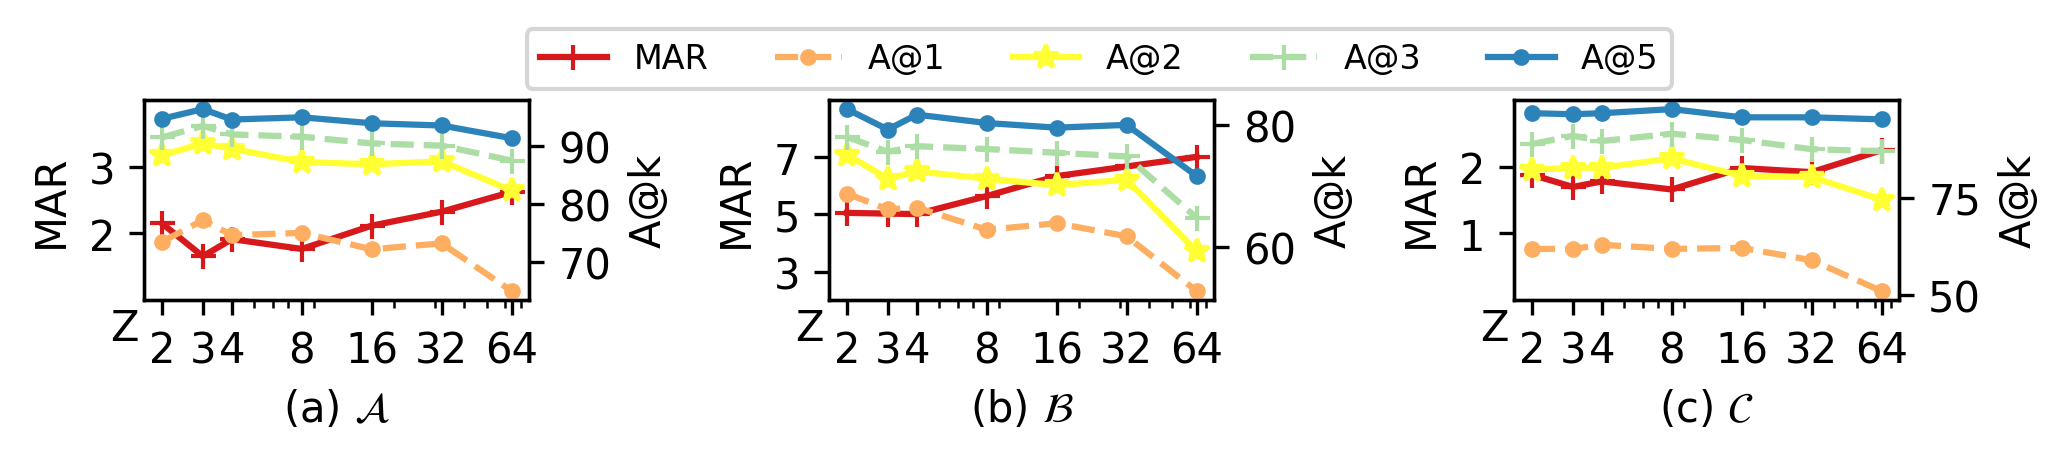

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from explib import get_line_style, legend_db
import matplotlib.ticker as mticker
from math import ceil

def plot_impact_of_z(data, ax, fig, legend=False):
    data = data.copy()
    data = data[data.Z.isin({2, 3, 4, 8, 16, 32, 64})]
    data = data.sort_values('Z')
    p1, = ax.plot(data.Z, data.MAR, marker='+', ls='-', label='MAR', c=legend_db.colors[0])
    ylim = [int(data['MAR'].mean() / 2), int(ceil(data['MAR'].mean() * 1.5))]
    ax.set_ylim(ylim)
#     ax.set_ylabel('MAR')
#     ax.legend(bbox_to_anchor=(1.1, 1))
    ax.set_xscale("log")
    ax.set_xticks([2, 3, 4, 8, 16, 32, 64], minor=False)
    ax.set_xticklabels(["2", "3", "4", "8", "16", "32", "64"], minor=False)
    ax.set_ylabel("MAR")
    ax.set_yticks(range(ylim[0] + 1, ylim[1], (ylim[1] - ylim[0]) // 4 + 1))
    ax.text(x=1.2, y=ylim[0] - (ylim[1] - ylim[0]) / 5, s="Z")
    
    ax2 = ax.twinx()
    p2, = ax2.plot(data.Z, data['A@1'], marker='.', ls='--', label='A@1', c=legend_db.colors[1])
    p3, = ax2.plot(data.Z, data['A@2'], marker='*', ls='-', label='A@2', c=legend_db.colors[2])
    p4, = ax2.plot(data.Z, data['A@3'], marker='+', ls='--', label='A@3', c=legend_db.colors[3])
    p5, = ax2.plot(data.Z, data['A@5'], marker='.', ls='-', label='A@5', c=legend_db.colors[4])
    ax2.set_ylabel("A@k")
#     ax.set_xticks([2, 3, 4, 8, 16, 32, 64], minor=False)
#     ax.set_xticklabels(["2", "3", "4", "8", "16", "32", "64"], minor=False)
#     ax.xaxis.set_major_locator(mticker.FixedLocator([2, 3, 4, 8, 16, 32, 64]))
    if legend:
        fig.legend(handles=[p1, p2, p3, p4, p5], bbox_to_anchor=(0.25, 0.88), loc='lower left', prop={'size': 8}, ncol=5)
    
#     fig.legend(loc="upper right", bbox_to_anchor=(1, 0.6), bbox_transform=ax.transAxes, ncol=3, fontsize='small')
#     plt.xticks([2, 3, 4, 5, 6], [2, 3, 4, 5, 6])
#     plt.xlim([2, 65])
#     plt.xscale("log")
#     plt.show()
    # plt.close(fig)
    return ax, ax2

fig, axes = plt.subplots(1, 3, figsize=(7, 1.4), dpi=300, sharey=False)
ax1, ax2 = plot_impact_of_z(dfa, axes[0], fig, legend=True)
# ax2.get_yaxis().set_visible(False)
ax3, ax4 = plot_impact_of_z(dfb, axes[1], fig)
# ax4.get_yaxis().set_visible(False)
ax5, ax6 = plot_impact_of_z(dfc, axes[2], fig)
# ax2.get_shared_y_axes().join(ax2, ax4, ax6)
ax1.set_xlabel("(a) $\mathcal{A}$")
ax3.set_xlabel("(b) $\mathcal{B}$")
ax5.set_xlabel("(c) $\mathcal{C}$")
plt.tight_layout()
plt.savefig("/SSF/output/impact_of_z_dim/impact_of_z_dim.pdf", bbox_inches='tight', pad_inches=0)
plt.show(fig)
plt.close(fig)

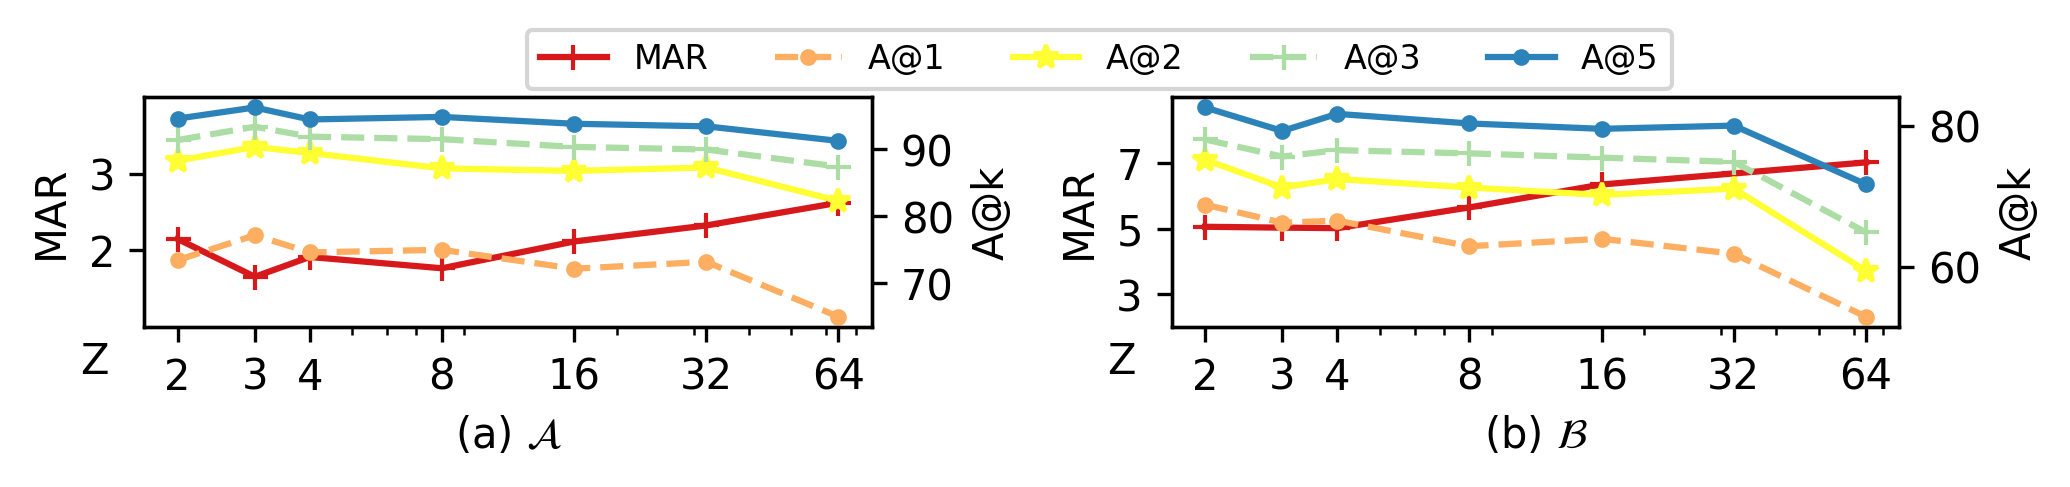

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(7, 1.5), dpi=300, sharey=False)
ax1, ax2 = plot_impact_of_z(dfa, axes[0], fig, legend=True)
ax3, ax4 = plot_impact_of_z(dfb, axes[1], fig)
ax1.set_xlabel("(a) $\mathcal{A}$")
ax3.set_xlabel("(b) $\mathcal{B}$")
plt.tight_layout()
plt.savefig("/SSF/output/impact_of_z_dim/impact_of_z_dim.pdf", bbox_inches='tight', pad_inches=0)
plt.show(fig)
plt.close(fig)